## Introduction

An inverted pendulum is a system where a mass is rigidly attached to a linearly moving platform. The platform can thus move in a 2-D plane so as to balance the attached mass at fixed angle to the plane of motion. The system is shown in Figure 1

![Inverted Pendulum](./Figures/InvertedPendulum.png)

## Literature Review

The course textbook describes the mathematics in deriving the state space equations that represent the system. 
The equations for the system are given by:
$$
\begin{bmatrix}
    \dot{x_1}(t)\\
    \dot{x_2}(t)\\
    \dot{x_3}(t)\\
    \dot{x_4}(t)\\
\end{bmatrix}=\begin{bmatrix}
    0 & 1 & 0 & 0 \\
    0 & 0 & \frac{-mg}{M} & 0 \\
    0 & 0 & 0 & 1 \\
    0 & 0 & \frac{(M+m)g}{Ml} & 0
    \end{bmatrix}\begin{bmatrix}
    x_1 \\
    x_2 \\
    x_3 \\
    x_4 \\
    \end{bmatrix} + \begin{bmatrix}
    0 \\ \frac{1}{M} \\ 0 \\ \frac{-1}{Ml}
    \end{bmatrix} u(t) \\
    y(t) = \begin{bmatrix}
    1 & 0 & 0 & 0
    \end{bmatrix}\mathbf{x}(t)
$$
where $ x_1(t) = y(t), x_2(t)=\dot{y}(t),x_3(t) =\theta(t), \mathrm{and\ } x_4(t)=\dot{\theta}(t)$. As the goal of the system is to maintain the attached mass in an upright postion, these equations are only valid for $\theta \rightarrow 0$. Furthermore, the output is only set to the distance, $y$, the cart needs to move from the starting point.

A more realistic model is given in CITE. This model accounts for friction between the cart wheels and the ground.

$$
\begin{bmatrix}
    \dot{x_1}(t)\\
    \dot{x_2}(t)\\
    \dot{x_3}(t)\\
    \dot{x_4}(t)\\
\end{bmatrix} = \begin{bmatrix}
    0 & 1 & 0 & 0 \\
    0 & \frac{-(I+ml^2)\mu}{I*(M+m)+Mml^2} & \frac{m^2gl^2}{I(M+m)+Mml^2} &  0\\
    0 &      0      &        0    &       1\\
    0 &  \frac{-(ml\mu)}{I*(M+m)+Mml^2}  &     \frac{mgl(M+m)}{I*(M+m)+Mml^2} &  0 
\end{bmatrix}\begin{bmatrix}
    x_1 \\
    x_2 \\
    x_3 \\
    x_4 \\
    \end{bmatrix}+ \begin{bmatrix}
    0 \\ \frac{I+ml^2}{I*(M+m)+M*m*l^2} \\ 0 \\ \frac{ml}{I*(M+m)+M*m*l^2}
    \end{bmatrix} u(t) \\
    y(t) = \begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 0 & 1 & 0
    \end{bmatrix}\mathbf{x}(t)
$$
where, $I$ is the moment of inertia of the pendulum and $\mu$ is the coefficient of friction between the ground and the cart's wheels.

For analysis, the first model is chosen for its simplicity

## Code and system

**Set the Parameters to ensure the system is controllable and observable. Prove the system is controllable and observable for the chosen paparmeters.**

In [89]:
from control import *
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from control.matlab import *
plt.rcParams['figure.figsize'] = [10, 10]

Set parameters for the inverted pendulum: Let 
$$
    g = 9.8 \mathrm{\ m/s^2} \\
    M = 2 \mathrm{\ kg} \\
    m = 1 \mathrm{\ kg} \\
    l = 0.5 \mathrm{\ m}\\
$$

In [90]:
m = 1 # mass of the pendulum.
M = 2 # mass of the cart.
g = 9.81 # gravity.
l = 0.5 # length of the pendulum.

A = np.array([[0,1,0,0],[0,0,-(m*g)/M,0],[0,0,0,1],[0,0,(M+m)*g/(M*l),0]]) #A is a system matrix.
B = np.array([[0],[1/M],[0],[-1/(M*l)]]) #B is an input matrix.
C = np.array([1,0,0,0]) #C is an Output matrix.
D = 0 #D is a Transmission matrix.

$$ $$ Check the Controlabilty:

In [262]:
Co = ctrb(A,B)    # Get the controlability matrix
print(Co)
rows,columns = np.shape(Co)
R1 = np.linalg.matrix_rank(Co)          # Get the rank of the controllability matrix
if R1 == rows :  # Check if matrix has full row rank 
    print("System is Controlable.")
    de1 = np.linalg.det(Co)
    print(de1) 
else:
    print("System is not Controllable")

[[  0.      0.5     0.      4.905]
 [  0.5     0.      4.905   0.   ]
 [  0.     -1.      0.    -29.43 ]
 [ -1.      0.    -29.43    0.   ]]
System is Controlable.
96.2361


As can be seen, the system is controllabe since the controlability matrix $\mathcal{C}_o$ has full row rank. Further, the determinant of matrix $\mathcal{C}_o$ is non zero. 

Check the Observability:

In [104]:
Obs = obsv(A,C)                    # Get the observability matrix
rows,columns = np.shape(Obs)
R2=np.linalg.matrix_rank(Obs)      # Get the rank of the observability matrix
if R2 == rows:                     # Check if matrix has full row rank
    print("System is observable.")
    de2 = np.linalg.det(Obs)
    print(de2) 
else:
    print("System is not Observable")

System is observable.
24.059025000000005


The system is observable as well. The observability matrix $\mathcal{O}$ is also full rank. Further, the determinant of matrix $\mathcal{O}$ is non zero. 

# Anoushka's stuff goes here

**Set the parameters to create an “unstable” system and apply “constant 
gain negative state-feedback” to make the system stable.**

We will use the same parameters as we used in the first part to check for stability and generate the needed gains

In [93]:
m = 1     # mass of the pendulum.
M = 2     # mass of the cart.
g = 9.81  # gravity.
l = 0.5   # length of the pendulum.

In [238]:
A = np.array([[0,1,0,0],[0,0,-(m*g)/M,0],[0,0,0,1],[0,0,(M+m)*g/(M*l),0]])
B = np.array([[0],[1/M],[0],[-1/(M*l)]])
C = np.array([[1,0,0,0],[0,0,1,0]])
D = 0

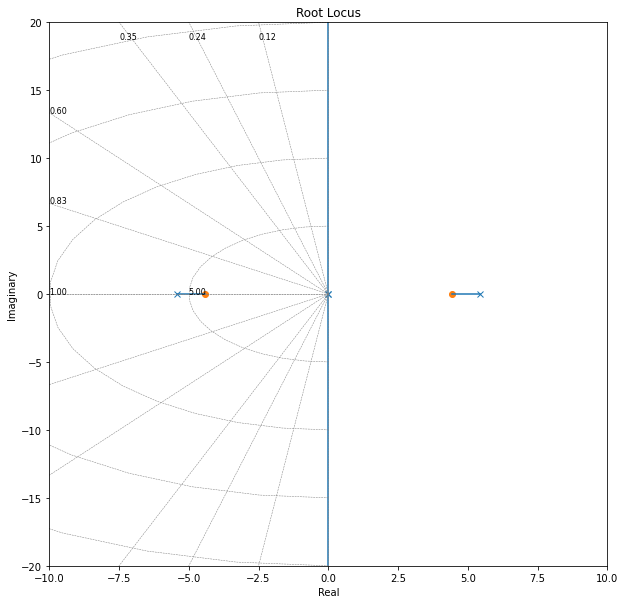

In [244]:
sys_y = ss(A,B,C[0:1],D)
r = rlocus(sys_y,xlim=[-10,10],ylim=[-20,20])

As can be seen, there are poles on the left half plane. Thus the system is unstable. Let us arbritrarily pick 4 poles such that the system can be made stable for some forward gain. Let the chosen poles be at (-5±j) and (-6±3j). These poles are fast enough to get us a settling time of $\lt 0.5$s

In [239]:
poles = [-5+1j,-5-1j,-6-3j,-6+3j]
k = place(A,B,poles)
print(k)

[[-119.26605505  -77.67584098 -280.06302752  -60.83792049]]


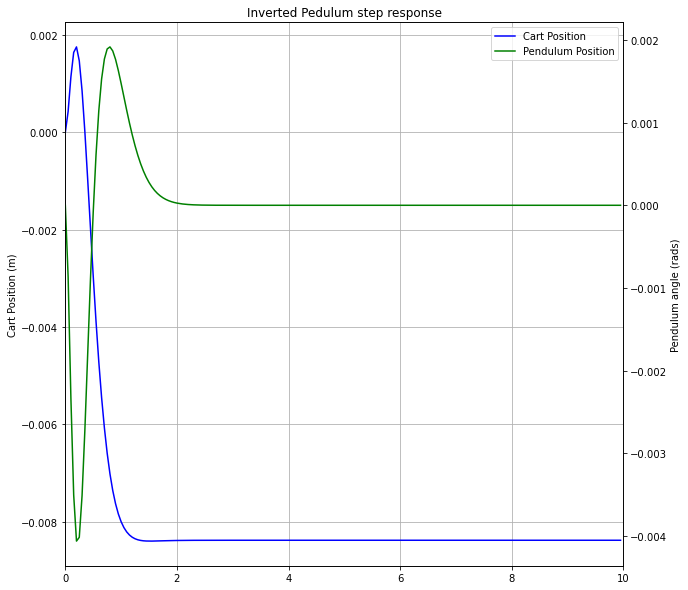

In [245]:
Afb = (A-np.dot(B,k))

sysfb_y = ss(Afb,B,C[0:1],D)
sysfb_angle = ss(Afb,B,C[1:],D)

T = np.arange(0,10,0.05)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

y,T=step(sysfb_y,T)
p = ax1.plot(T,y,'b-')

y,T = step(sysfb_angle,T)
p = ax2.plot(T,y,'g-')

e = ax1.grid()
e = plt.xlim([0,10])
e = ax1.set_ylabel('Cart Position (m)')
e = ax2.set_ylabel('Pendulum angle (rads)')
e = plt.xlabel('Time (s)')
e = plt.title('Inverted Pedulum step response')
e = fig.legend(['Cart Position','Pendulum Position'],loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()

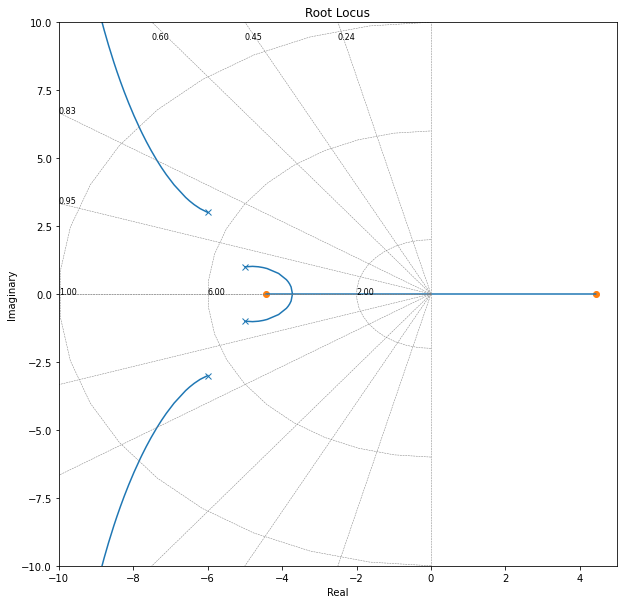

In [261]:
fig = plt.figure()
ax  = plt.axes()
r,k = root_locus(sysfb,xlim=[-10,5],ylim=[-10,10],ax=ax)

## Conclusions
## References